In [1]:
import numpy as np

In [2]:
path='/content/text.txt'
with open(path,'r',encoding='utf-8')as f:
  txt=f.read()

In [3]:
txt

'Nikola Tesla[a] (10 July 1856 – 7 January 1943) was a Serbian-American engineer, futurist, and inventor. He is known for his contributions to the design of the modern alternating current (AC) electricity supply system.[2]\n\nBorn and raised in the Austrian Empire, Tesla first studied engineering and physics in the 1870s without receiving a degree. He then gained practical experience in the early 1880s working in telephony and at Continental Edison in the new electric power industry. In 1884, he immigrated to the United States, where he became a naturalized citizen. He worked for a short time at the Edison Machine Works in New York City before he struck out on his own. With the help of partners to finance and market his ideas, Tesla set up laboratories and companies in New York to develop a range of electrical and mechanical devices. His AC induction motor and related polyphase AC patents, licensed by Westinghouse Electric in 1888, earned him a considerable amount of money and became t

In [4]:
import re
new_txt=re.sub(r'\[\d+\]','',txt)

In [5]:
new_txt

'Nikola Tesla[a] (10 July 1856 – 7 January 1943) was a Serbian-American engineer, futurist, and inventor. He is known for his contributions to the design of the modern alternating current (AC) electricity supply system.\n\nBorn and raised in the Austrian Empire, Tesla first studied engineering and physics in the 1870s without receiving a degree. He then gained practical experience in the early 1880s working in telephony and at Continental Edison in the new electric power industry. In 1884, he immigrated to the United States, where he became a naturalized citizen. He worked for a short time at the Edison Machine Works in New York City before he struck out on his own. With the help of partners to finance and market his ideas, Tesla set up laboratories and companies in New York to develop a range of electrical and mechanical devices. His AC induction motor and related polyphase AC patents, licensed by Westinghouse Electric in 1888, earned him a considerable amount of money and became the 

In [6]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer

In [7]:
token=Tokenizer()

In [8]:
token.fit_on_texts([new_txt])

In [9]:
len(token.word_index)

2080

In [10]:
input_sequence=[]
for sentence in new_txt.split('\n'):
  tokenized_sentence=token.texts_to_sequences([sentence])[0]
  for i in range(1,len(tokenized_sentence)):
    input_sequence.append(tokenized_sentence[:i+1])

In [11]:
input_sequence

[[289, 20],
 [289, 20, 5],
 [289, 20, 5, 429],
 [289, 20, 5, 429, 290],
 [289, 20, 5, 429, 290, 430],
 [289, 20, 5, 429, 290, 430, 168],
 [289, 20, 5, 429, 290, 430, 168, 211],
 [289, 20, 5, 429, 290, 430, 168, 211, 111],
 [289, 20, 5, 429, 290, 430, 168, 211, 111, 431],
 [289, 20, 5, 429, 290, 430, 168, 211, 111, 431, 9],
 [289, 20, 5, 429, 290, 430, 168, 211, 111, 431, 9, 5],
 [289, 20, 5, 429, 290, 430, 168, 211, 111, 431, 9, 5, 432],
 [289, 20, 5, 429, 290, 430, 168, 211, 111, 431, 9, 5, 432, 212],
 [289, 20, 5, 429, 290, 430, 168, 211, 111, 431, 9, 5, 432, 212, 433],
 [289, 20, 5, 429, 290, 430, 168, 211, 111, 431, 9, 5, 432, 212, 433, 779],
 [289, 20, 5, 429, 290, 430, 168, 211, 111, 431, 9, 5, 432, 212, 433, 779, 4],
 [289,
  20,
  5,
  429,
  290,
  430,
  168,
  211,
  111,
  431,
  9,
  5,
  432,
  212,
  433,
  779,
  4,
  213],
 [289,
  20,
  5,
  429,
  290,
  430,
  168,
  211,
  111,
  431,
  9,
  5,
  432,
  212,
  433,
  779,
  4,
  213,
  7],
 [289,
  20,
  5,
  429,


In [12]:
max_len=max([len(x) for x in input_sequence])

In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
padded_input_sequence=pad_sequences(input_sequence,maxlen=max_len,padding='pre')

In [14]:
padded_input_sequence

array([[  0,   0,   0, ...,   0, 289,  20],
       [  0,   0,   0, ..., 289,  20,   5],
       [  0,   0,   0, ...,  20,   5, 429],
       ...,
       [  0,   0,   0, ...,  40,   6, 519],
       [  0,   0,   0, ...,   6, 519,   6],
       [  0,   0,   0, ..., 519,   6, 283]], dtype=int32)

In [15]:
X=padded_input_sequence[:,:-1]

In [16]:
y=padded_input_sequence[:,-1]

In [17]:
print(X.shape)
print(y.shape)

(6725, 225)
(6725,)


In [18]:
from tensorflow.keras.utils import to_categorical
y=to_categorical(y,num_classes=2081)

In [19]:
X.shape

(6725, 225)

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding,LSTM,Dense,Input

In [97]:
model=Sequential([Input(shape=(226,)),Embedding(input_dim=(2081),output_dim=100),LSTM(128,return_sequences=False,dropout=0.2),Dense(2081,activation='softmax')])
# model.add(Embedding(2081,100, input_length=226))
# model.add(LSTM(128,return_sequences=False,dropout=0.2,recurrent_dropout=0.2))

# model.add(Dense(2081,activation='softmax'))

In [98]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [99]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ (None, 226, 100)       │       208,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       117,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 2081)           │       268,449 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 593,797 (2.27 MB)

 Trainable params: 593,797 (2.27 MB)

 Non-trainable params: 0 (0.00 B)

In [100]:
history=model.fit(X,y,epochs=50,batch_size=64,validation_split=0.2)

Epoch 1/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.0363 - loss: 7.2187 - val_accuracy: 0.0572 - val_loss: 6.8427
Epoch 2/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0448 - loss: 6.3567 - val_accuracy: 0.0572 - val_loss: 6.9258
Epoch 3/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0569 - loss: 6.2036 - val_accuracy: 0.0669 - val_loss: 7.0238
Epoch 4/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0672 - loss: 6.1087 - val_accuracy: 0.0647 - val_loss: 7.0793
Epoch 5/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.0656 - loss: 5.9791 - val_accuracy: 0.0647 - val_loss: 7.1879
Epoch 6/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.0742 - loss: 5.8959 - val_accuracy: 0.0706 - val_loss: 7.3053
Epoch 7/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0806 - loss: 5.8926 - val_accuracy: 0.0736 - val_loss: 7.4259
Epoch 8/50
85/85 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.0881 - loss: 5.7265 - val_accuracy: 0.0781 - v

In [101]:
import matplotlib.pyplot as plt

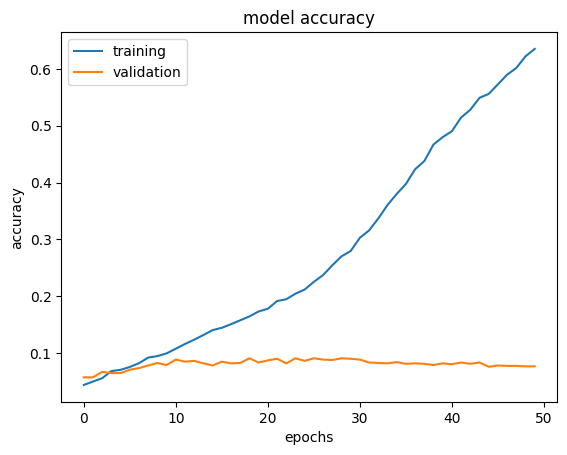

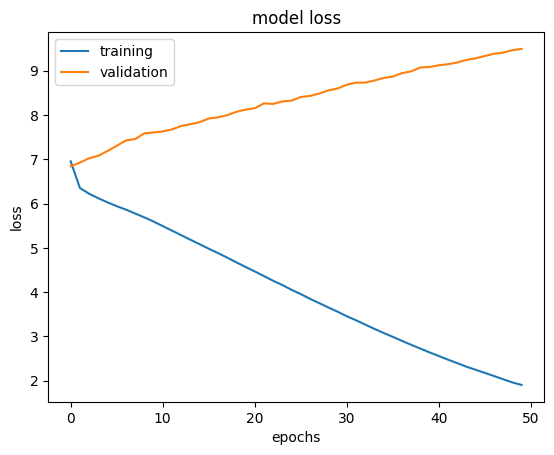

In [102]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['training','validation'])
plt.show()


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['training','validation'])
plt.show()

In [103]:
text_test="University of Calcutta"
token_test_text=token.texts_to_sequences(text_test)[0]
padded_test_text=pad_sequences([token_test_text],maxlen=max_len,padding='pre')
preds=model.predict(padded_test_text)
preds=preds[0,-1]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step


In [104]:
preds

np.float32(5.5323824e-08)

In [105]:
def temparature_sampling(preds,temp=1.2):
  preds=np.asarray(preds).astype('float64')
  preds=np.log(preds + 1e-9)/temp
  exp_preds=np.exp(preds)
  prob=exp_preds/np.sum(exp_preds)
  return np.random.choice(len(prob),p=prob)

In [106]:
for _ in range(20):
  token_list=token.texts_to_sequences(text_test)[0]
  token_list=pad_sequences([token_list],maxlen=max_len,padding='pre')
  preds=model.predict(token_list)
  if preds.ndim==3:
    preds=preds[0,-1]
  else:
    preds=preds[0]

  next_index=temparature_sampling(preds,temp=1.2)
  next_word=token.index_word.get(next_index," ")

  text_test+=" "+next_word

  print(text_test)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
University of Calcutta 1894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
University of Calcutta 1894 him
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
University of Calcutta 1894 him 1888
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
University of Calcutta 1894 him 1888 smiljan
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
University of Calcutta 1894 him 1888 smiljan 1894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
University of Calcutta 1894 him 1888 smiljan 1894 poland
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
University of Calcutta 1894 him 1888 smiljan 1894 poland 1879
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
University of Calcutta 1894 him 1888 smiljan 1894 poland 1879 sent
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
University of Calcutta 1894 him 1888 smiljan 1894 poland 1879 sent her
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
University of Calcutta 1894 him 1888 smiljan 1894 poland 1879 sent her 1894
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
University of Calcutta 1894 him 1888 smiljan 1894 poland 

In [107]:
import time
text_test="At that time"
for i in range(10):
  #tokenize

  #padding
  padded_test_text=pad_sequences([token_test_text],maxlen=max_len,padding='pre')
  #predict
  pos=np.argmax(model.predict(padded_test_text))


  for word,index in token.word_index.items():
    if index==pos:
      text_test=text_test +" "+ word
      print(text_test)
      time.sleep(2)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
At that time the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
At that time the the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
At that time the the the
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
At that time the the the the


KeyboardInterrupt: 

In [ ]:
token.word_index

{'the': 1,
 'in': 2,
 'of': 3,
 'and': 4,
 'a': 5,
 'to': 6,
 'he': 7,
 'his': 8,
 'was': 9,
 'that': 10,
 'for': 11,
 'at': 12,
 'on': 13,
 'as': 14,
 'she': 15,
 'bose': 16,
 'her': 17,
 'with': 18,
 'from': 19,
 'tesla': 20,
 'first': 21,
 'by': 22,
 'an': 23,
 'had': 24,
 'university': 25,
 'research': 26,
 'school': 27,
 'physics': 28,
 'father': 29,
 'him': 30,
 'which': 31,
 'this': 32,
 'born': 33,
 'but': 34,
 'it': 35,
 'family': 36,
 'college': 37,
 'einstein': 38,
 'where': 39,
 'were': 40,
 'year': 41,
 'not': 42,
 'who': 43,
 'paper': 44,
 'maria': 45,
 'curie': 46,
 'indian': 47,
 'new': 48,
 'made': 49,
 'after': 50,
 'work': 51,
 'education': 52,
 'later': 53,
 'years': 54,
 'two': 55,
 'institute': 56,
 'nobel': 57,
 'became': 58,
 'motor': 59,
 'when': 60,
 'also': 61,
 'received': 62,
 'their': 63,
 'india': 64,
 'radio': 65,
 'raman': 66,
 'time': 67,
 'been': 68,
 'age': 69,
 'scientific': 70,
 'i': 71,
 'presidency': 72,
 'my': 73,
 'is': 74,
 'electric': 75,
 'h